In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

from tqdm import trange
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [7]:
df = pd.read_csv("C:/Users/user/Desktop/2603.csv")

In [11]:
df["spread"] = df["ask_1"] - df["bid_1"]
df["total_qty"] = df["ask_qty1"] + df["bid_qty1"]
df["flow_imbalance"] = df["bid_qty1"] - df["ask_qty1"]
df["weighted_qty"] = df["total_qty"]*(np.log(df["spread"]+1))
df["mid_1"] = df["bid_1"]+ (df["ask_1"] - df["bid_1"])/2
df["mid_pct"] = df["mid_1"].pct_change(1)
df["theo"] = ((((df["bid_qty1"]/df["total_qty"])*df["bid_1"]+(df["ask_qty1"]/df["total_qty"])*df["ask_1"])-df["bid_1"])/df["spread"])+df["bid_1"]
df["theo_pct"] = df["theo"].pct_change(1)
df = df.dropna()

In [12]:
df

,index,zdate,stk_id7,stk_time,deal_or_not,deal_price,deal_qty,bid_1,bid_qty1,bid2,...,ask_5,ask_qty5,spread,total_qty,flow_imbalance,weighted_qty,mid_1,mid_pct,theo,theo_pct
2,3,2021/3/26,2603,44281.37501,0,0.00,0,42.00,197,41.95,...,42.25,226,0.05,469,-75,22.882587,42.025,0.000000,42.579957,0.000000
3,4,2021/3/26,2603,44281.37501,0,0.00,0,42.00,197,41.95,...,42.25,226,0.05,469,-75,22.882587,42.025,0.000000,42.579957,0.000000
4,5,2021/3/26,2603,44281.37501,0,0.00,0,42.00,198,41.95,...,42.25,226,0.05,470,-74,22.931377,42.025,0.000000,42.578723,-0.000029
5,6,2021/3/26,2603,44281.37501,0,0.00,0,42.00,198,41.95,...,42.25,226,0.05,470,-74,22.931377,42.025,0.000000,42.578723,0.000000
6,7,2021/3/26,2603,44281.37501,0,0.00,0,42.00,198,41.95,...,42.25,226,0.05,470,-74,22.931377,42.025,0.000000,42.578723,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81604,81605,2021/3/26,2603,44281.56229,1,43.25,7304,43.20,335,43.15,...,43.45,1037,0.05,423,247,20.638239,43.225,0.000000,43.408038,-0.001093
81605,81606,2021/3/26,2603,44281.56235,1,43.10,5700,43.10,363,43.05,...,43.35,764,0.05,961,-235,46.887348,43.125,-0.002313,43.722268,0.007239
81606,81607,2021/3/26,2603,44281.56241,1,43.05,5515,43.05,1831,43.00,...,43.30,536,0.05,2021,1641,98.604922,43.075,-0.001159,43.144013,-0.013226
81607,81608,2021/3/26,2603,44281.56247,1,43.05,5517,43.05,2496,43.00,...,43.30,536,0.05,2687,2305,131.099171,43.075,0.000000,43.121083,-0.000531


In [13]:
df["mid_pct"].max()

0.002962085308056972

In [14]:
df["bottom_fishing"] = df["flow_imbalance"]*0
df["top_run"] = df["flow_imbalance"]*0
for i in trange(1,len(df["bottom_fishing"])):
    if df["deal_or_not"].iloc[i] == 1 and df["deal_price"].iloc[i] == df["ask_1"].iloc[i] and df["bid_qty1"].iloc[i] ==df["bid_qty1"].iloc[i-1]:
        df["bottom_fishing"].iloc[i] = 1
    elif df["deal_or_not"].iloc[i] == 1 and df["deal_price"].iloc[i] == df["bid_1"].iloc[i] and df["ask_qty1"].iloc[i] ==df["ask_qty1"].iloc[i-1]:
        df["top_run"].iloc[i] = 1
df = df.dropna()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
  0%|                                                                                        | 0/81391 [00:00<?, ?it/s]C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be 

In [65]:
df["action"] = df["bottom_fishing"]*0
window = 30
for i in trange(window, len(df["bottom_fishing"])):
    if df["bottom_fishing"].iloc[(i-window):i].sum()>10 and df["action"].iloc[0:i].sum() < 1:
        df["action"].iloc[i] = 1
    elif df["top_run"].iloc[(i-window):i].sum()>13 and df["action"].iloc[0:i].sum() > -1:
        df["action"].iloc[i] = -1

        

100%|██████████████████████████████████████████████████████████████████████████| 81362/81362 [00:24<00:00, 3265.70it/s]


In [66]:
df[df["action"]<0]

,index,zdate,stk_id7,stk_time,deal_or_not,deal_price,deal_qty,bid_1,bid_qty1,bid2,...,mid_pct,theo,theo_pct,bottom_fishing,top_run,action,position,return,fee,return2
4933,4934,2021/3/26,2603,44281.37790,1,42.35,69,42.35,13,42.30,...,0.000000,43.308466,0.004014,0,1,-1,0,0.0,0.0015,1.005306
4934,4935,2021/3/26,2603,44281.37790,1,42.35,1,42.35,12,42.30,...,0.000000,43.311538,0.000071,0,1,-1,-1,-0.0,0.0015,1.003798
5917,5918,2021/3/26,2603,44281.37844,0,0.00,0,42.40,229,42.35,...,0.000000,43.132164,0.000000,0,0,-1,0,0.0,0.0015,1.000462
13221,13222,2021/3/26,2603,44281.38585,0,0.00,0,42.50,439,42.45,...,0.000000,42.859124,0.000024,0,0,-1,0,0.0,0.0015,1.002176
13222,13223,2021/3/26,2603,44281.38585,1,42.55,20,42.50,439,42.45,...,0.000000,42.839850,-0.000450,1,0,-1,-1,-0.0,0.0015,1.000673
16595,16596,2021/3/26,2603,44281.39090,0,0.00,0,42.35,209,42.30,...,0.000000,42.896638,0.000000,0,0,-1,0,0.0,0.0015,0.998406
16596,16597,2021/3/26,2603,44281.39090,1,42.35,2,42.35,207,42.30,...,0.000000,42.899020,0.000056,0,1,-1,-1,-0.0,0.0015,0.996908
22640,22641,2021/3/26,2603,44281.40373,1,42.00,10,42.00,64,41.95,...,0.000000,42.607362,0.000825,0,1,-1,0,0.0,0.0015,0.994694
22641,22642,2021/3/26,2603,44281.40373,0,0.00,0,42.00,64,41.95,...,0.000000,42.609756,0.000056,0,0,-1,-1,-0.0,0.0015,0.993202
26167,26168,2021/3/26,2603,44281.41455,1,42.15,5,42.15,134,42.10,...,0.000000,42.911989,0.000156,0,1,-1,0,0.0,0.0015,0.994627


100%|████████████████████████████████████████████████████████████████████████| 81392/81392 [00:00<00:00, 105381.71it/s]


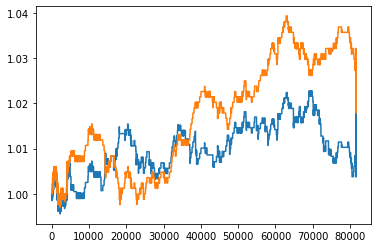

In [67]:
df["position"] = df["action"].cumsum()
df["return"] = df["position"]*df["mid_pct"]
df["fee"] = df["return"]*0
for i in trange(0,len(df["action"])):
    if df["action"].iloc[i]<0:
        df["fee"] = (np.abs(df["action"]))*0.0015

df["return2"] = (df["return"]+1-df["fee"]).cumprod()
plt.plot(df["return2"])

plt.plot((df["mid_pct"]+1).cumprod())

In [70]:
df["return2"].corr((df["mid_pct"]+1).cumprod())

0.6262945436934023

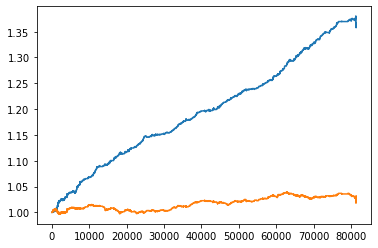

In [79]:
plt.plot(df["return2"])

plt.plot((df["mid_pct"]+1).cumprod())